In [1]:
from keras.applications import vgg16
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input

from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

In [2]:
imgs_path = 'C:/Projects/Similar Visual Recommendation System/shoes/'
imgs_model_width, imgs_model_height = 224, 224

In [3]:
nb_closest_images = 5 

In [4]:
vgg_model = vgg16.VGG16(weights='imagenet')
feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)


feat_extractor.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [5]:
files = [imgs_path + x for x in os.listdir(imgs_path) if "jpg" in x]

print("number of images:",len(files))

number of images: 50


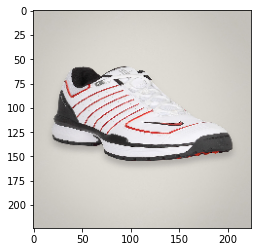

image loaded successfully!


In [6]:
# load an image in PIL format
original = load_img(files[0], target_size=(imgs_model_width, imgs_model_height))
plt.imshow(original)
plt.show()
print("image loaded successfully!")

In [7]:
numpy_image = img_to_array(original)
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
processed_image = preprocess_input(image_batch.copy())

image batch size (1, 224, 224, 3)


In [8]:
img_features = feat_extractor.predict(processed_image)
print("features successfully extracted!")
print("number of image features:",img_features.size)
img_features

features successfully extracted!
number of image features: 4096


array([[0.        , 0.        , 0.03844398, ..., 0.        , 0.13565993,
        0.59097904]], dtype=float32)

In [9]:
importedImages = []

for f in files:
    filename = f
    original = load_img(filename, target_size=(224, 224))
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)
    
    importedImages.append(image_batch)
    
images = np.vstack(importedImages)

processed_imgs = preprocess_input(images.copy())

In [10]:
imgs_features = feat_extractor.predict(processed_imgs)

print("features successfully extracted!")
imgs_features.shape

features successfully extracted!


(50, 4096)

In [11]:
cosSimilarities = cosine_similarity(imgs_features)
cos_similarities_df = pd.DataFrame(cosSimilarities, columns=files, index=files)
cos_similarities_df.head()
cos_similarities_df.to_csv(r'C:/Users/AbhiShri/DS17_Project 4_Similar Visual Recommendation System_Abhishek Navarkar/model/data.csv')

In [12]:
def retrieve_most_similar_products(given_img):
    print("-----------------------------------------------------------------------")
    print("original product:")
    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()
    print("-----------------------------------------------------------------------")
    print("most similar products:")
    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
    closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1]

    for i in range(0,len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()
        print("similarity score : ",closest_imgs_scores[i])

-----------------------------------------------------------------------
original product:


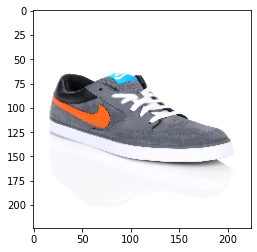

-----------------------------------------------------------------------
most similar products:


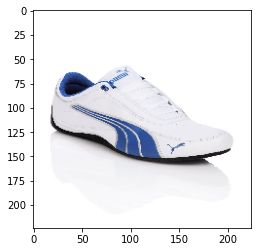

similarity score :  0.8261694


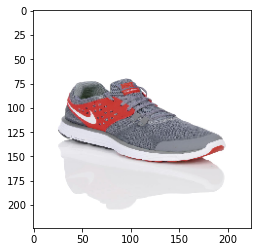

similarity score :  0.8185309


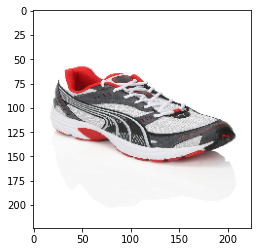

similarity score :  0.8180816


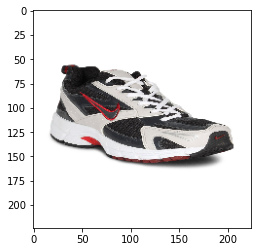

similarity score :  0.80627304


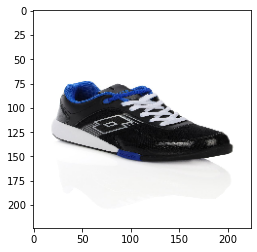

similarity score :  0.79086053


In [13]:
retrieve_most_similar_products(files[1])

-----------------------------------------------------------------------
original product:


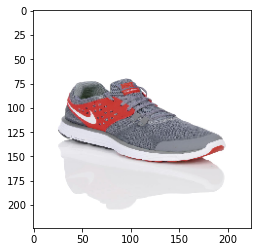

-----------------------------------------------------------------------
most similar products:


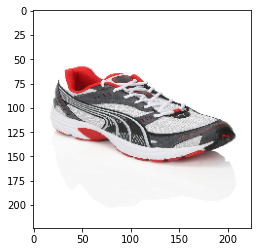

similarity score :  0.83545566


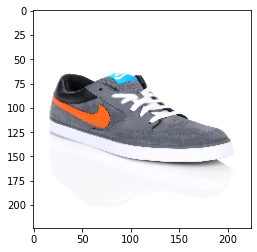

similarity score :  0.8185309


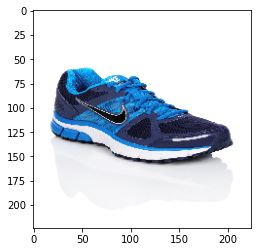

similarity score :  0.81586385


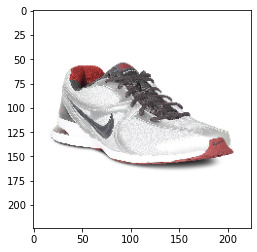

similarity score :  0.79529023


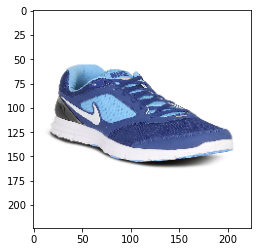

similarity score :  0.794531


In [14]:
retrieve_most_similar_products(files[8])

In [15]:
from tensorflow.keras.models import load_model
from tensorflow import keras
vgg_model.save('model_vgg16.h5')

In [16]:
model=keras.models.load_model('model_vgg16.h5')

In [17]:
model_json = vgg_model.to_json()
with open("model_vgg16.json", "w") as json_file:
    json_file.write(model_json)